In [1]:
# 📦 Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📁 Load prepared datasets
df_sales = pd.read_csv("../OLAP/sales_data_prepared_updated.csv")
df_customers = pd.read_csv("../OLAP/customers_data_prepared_updated.csv")

# 🔗 Merge sales and customer data
df_merged = pd.merge(df_sales, df_customers, on="CustomerID", how="left")

# 🕒 Convert sale date and extract month
df_merged["SaleDate"] = pd.to_datetime(df_merged["SaleDate"])
df_merged["Month"] = df_merged["SaleDate"].dt.to_period("M").astype(str)

# ✅ Quick preview
df_merged.head()


,TransactionID,SaleDate,CustomerID,ProductID,StoreID,CampaignID,SaleAmount,DiscountPercent,PaymentType,BonusPoints,Name,Region,JoinDate,LoyaltyPoints,Gender,CustomerSegment,Month
0,550,2024-01-06,1008,102,404,0,39.10,0,Debit,329,Tony Stark,North,5/1/2020,1,M,Budget,2024-01
1,551,2024-01-06,1009,105,403,0,19.78,0,Cash,225,Jason Bourne,West,12/1/2020,0,M,Budget,2024-01
2,552,2024-01-16,1004,107,404,0,335.10,0,GiftCard,462,Chewbacca,West,11/9/2022,24,M,Budget,2024-01
3,553,2024-01-16,1006,102,406,0,195.50,0,Cash,185,Tiffany James,South,6/7/2021,54,F,Premium,2024-01
4,554,2024-01-25,1005,102,405,0,117.30,0,Credit,37,Dr Who,North,8/18/2023,32,M,Regular,2024-01


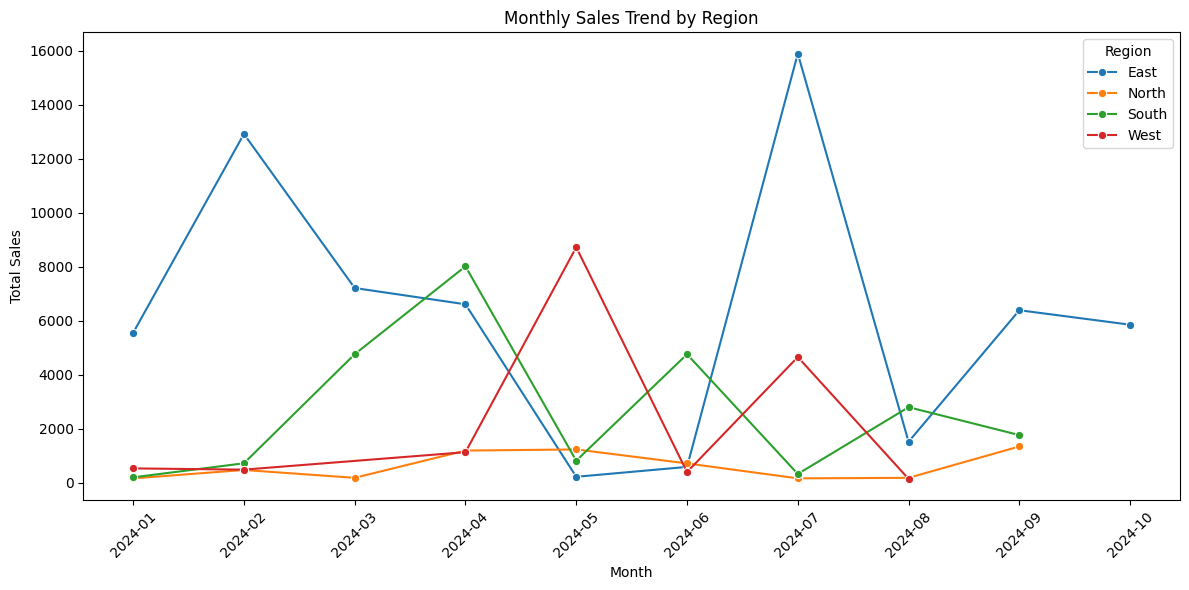

In [2]:
# 📊 Total Sales by Region and Month (slicing + dicing)
region_month_sales = df_merged.groupby(["Month", "Region"])["SaleAmount"].sum().reset_index()

# 📈 Line chart: Sales trend by region over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=region_month_sales, x="Month", y="SaleAmount", hue="Region", marker="o")
plt.title("Monthly Sales Trend by Region")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


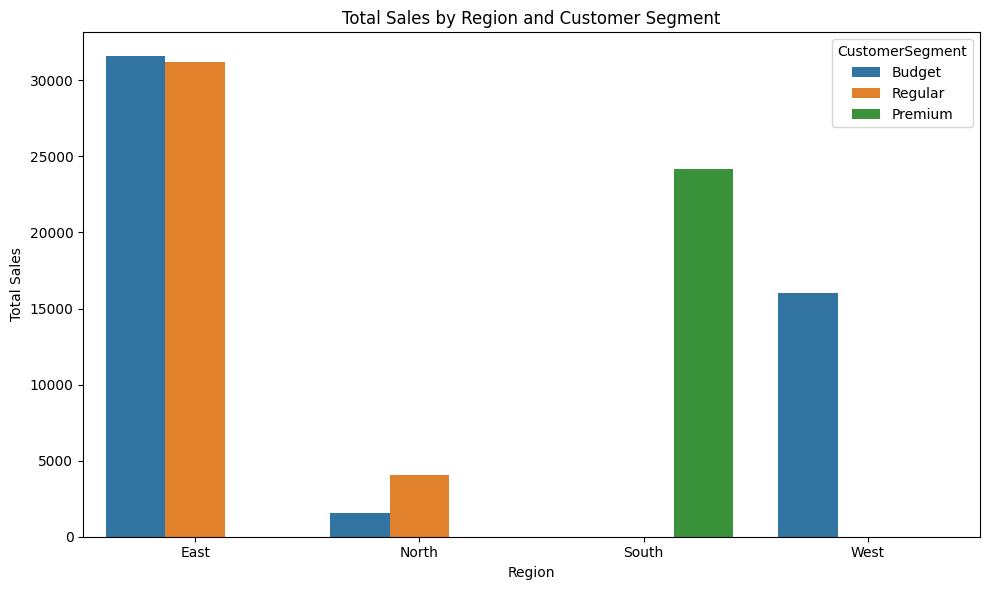

In [3]:
# 📊 Total Sales by Region and Customer Segment
segment_region_sales = df_merged.groupby(["Region", "CustomerSegment"])["SaleAmount"].sum().reset_index()

# 📊 Bar chart: Segment sales per region
plt.figure(figsize=(10, 6))
sns.barplot(data=segment_region_sales, x="Region", y="SaleAmount", hue="CustomerSegment")
plt.title("Total Sales by Region and Customer Segment")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


## 🔍 Ethical Considerations & AI Reflection

- **Data Responsibility**: The data used in this project was cleaned and prepared, but it's important to ensure it does not exclude or misrepresent certain regions or segments.
- **Bias Awareness**: Relying on historical data can reinforce existing biases — for example, favoring regions that already perform well.
- **Human Oversight**: While data can guide decisions, humans must interpret insights carefully and consider business context.
- **Responsible Use**: These insights should be used to improve service and performance fairly, not to exclude customers or limit access.
